# Using Cascade Classifier to detect cars from images

In this example, we use pre-built classifier for Object Detection from images i.e. detect cars

Below is the expected outcome

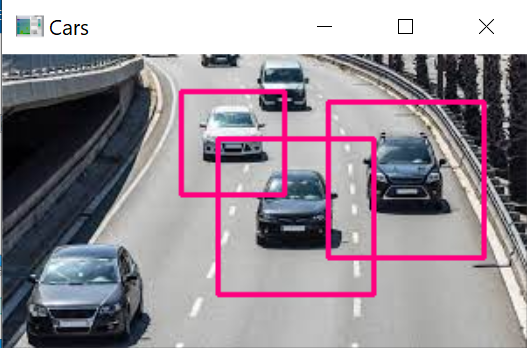

###  Remember to press the "q" key to exit from the pop up window

In [ ]:
import cv2

# Load built-in cascade classifier. You can find these XMLs online or in your opencv installation
# Example location: C:\Users\john\anaconda3\Lib\site-packages\cv2\data
car_classifier = cv2.CascadeClassifier('cars.xml')

img = cv2.imread('images/cars1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cars = car_classifier.detectMultiScale(gray, 1.05, 3)
print("Number of cars detected: ", len(cars))

# When no faces detected, face_classifier returns and empty tuple
if len(cars) == 0:
    print("No Cars Found")
    
for (x,y,w,h) in cars:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('Cars',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()


## Detect pedestrians using fullbody classifier.

Expected outcome:
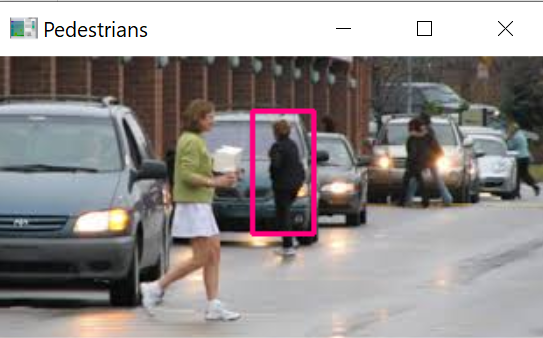

In [ ]:
import cv2

# Load built-in cascade classifier. You can find these XMLs online or in your opencv installation
# Example location: C:\Users\john\anaconda3\Lib\site-packages\cv2\data
ped_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

img = cv2.imread('images/ped2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

peds = ped_classifier.detectMultiScale(gray, 1.05, 3)
print("Number of cars detected: ", len(peds))

# When no faces detected, face_classifier returns and empty tuple
if len(peds) == 0:
    print("No Pedestrians Found")
    
for (x,y,w,h) in peds:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('Pedestrians',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()

# Detect Cars in a video

In [ ]:
import cv2
import time
import numpy as np

# Create our body classifier
car_classifier = cv2.CascadeClassifier('cars.xml')

# Initiate video capture for video file
cap = cv2.VideoCapture('videos/highway_cars_video.avi')


# Loop once video is successfully loaded
while cap.isOpened():
    
    time.sleep(.05)
    # Read first frame
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
    # Pass frame to our car classifier
    cars = car_classifier.detectMultiScale(gray, 1.4, 2)
    
    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in cars:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2.imshow('Cars', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

# Detect Pedestrians in a video using fullbody classifier

In [ ]:
import cv2
import numpy as np

# Create our body classifier
body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

# Initiate video capture for video file
cap = cv2.VideoCapture('videos/pedestrian_video.avi')

# Loop once video is successfully loaded
while cap.isOpened():
    
    # Read first frame
    ret, frame = cap.read()
    #frame = cv2.resize(frame, None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Pass frame to our body classifier
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
    
    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2.imshow('Pedestrians', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

Expected Outcome (snapshot)
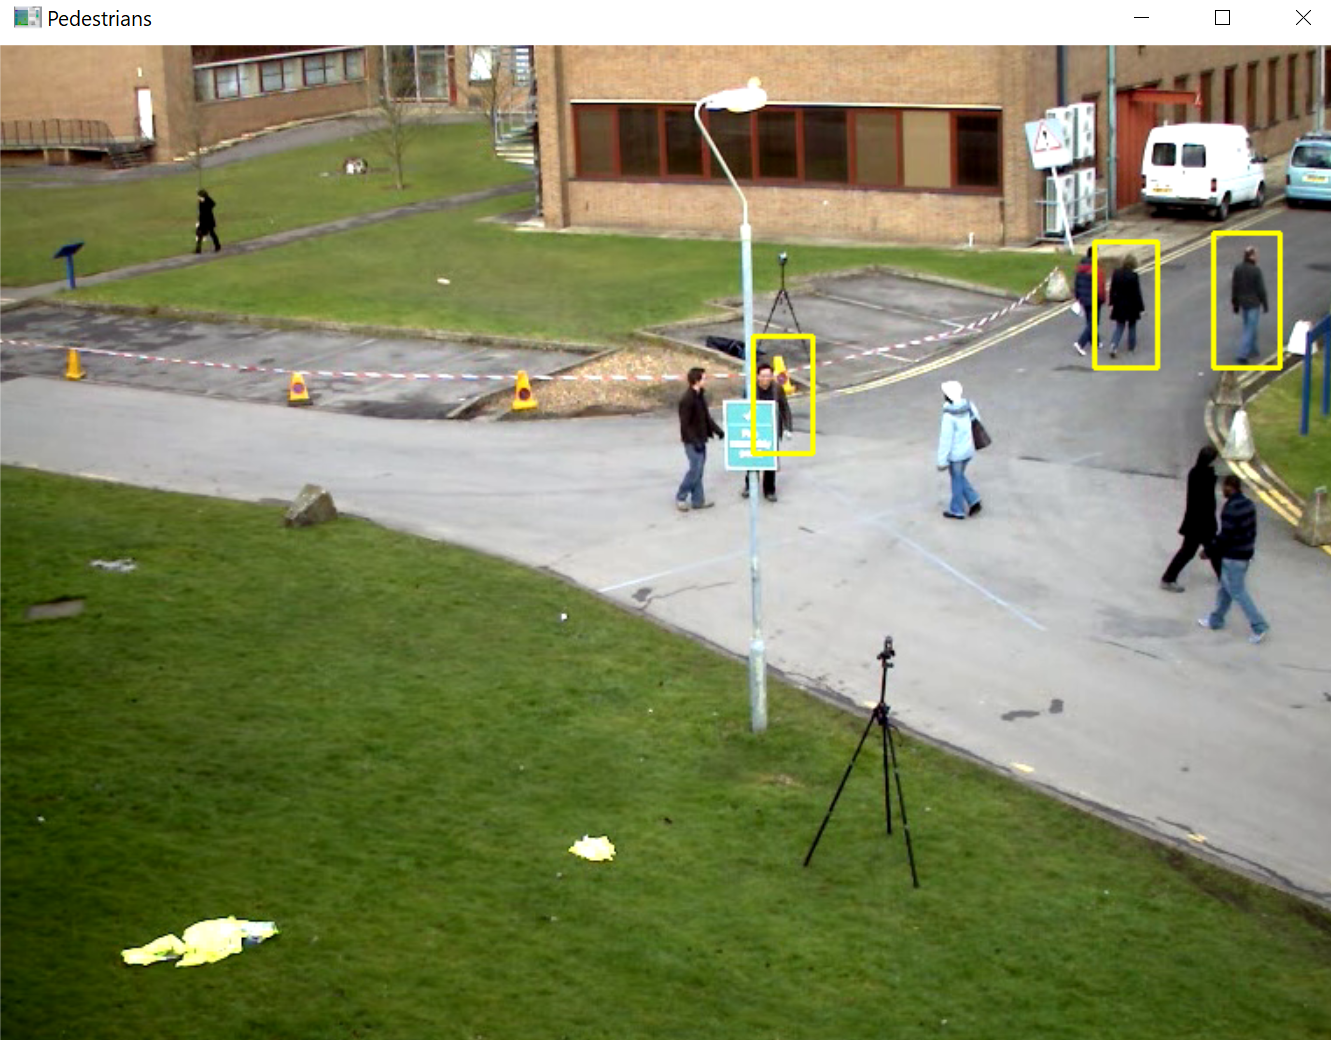